In [1]:
print("Importing Libraries")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
import seaborn as sns

print("Tensor Flow Version: "+str(tf.__version__))


Importing Libraries
Tensor Flow Version: 2.2.0-rc2


# Description of Data:
The attributes for this data are defined below:
    1. Sex / nominal / -- / M, F, and I (infant)
    2. Length / continuous / mm / Longest shell measurement
    3. Diameter / continuous / mm / perpendicular to length
    4. Height / continuous / mm / with meat in shell
    5. Whole weight / continuous / grams / whole abalone
    6. Shucked weight / continuous / grams / weight of meat
    7. Viscera weight / continuous / grams / gut weight (after bleeding)
    8. Shell weight / continuous / grams / after being dried

What we are trying to predict is the number of rings:
    Rings / integer / -- / +1.5 gives the age in years

In [2]:
data_file = pd.read_csv("abalone.data");

In [3]:
data_file.dropna()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


### Change the Sex from M/F/I to 1/2/3 

In [4]:
data_file['Sex'] = data_file['Sex'].map({ "M":1, "F":2, "I":3})

In [87]:
# carryout out 80-20 split of the data randomly.
# Also prevents bias due to unshuffled data (random sampling can be skipped as this data is pretty well shuffled by default)
train_data = data_file.sample(frac = 0.8, random_state = np.random.RandomState())#[["Sex","Length", "Diameter", "Height", "Whole_weight", "Rings"]]
test_data = data_file.drop(train_data.index)#[["Sex","Length", "Diameter", "Height", "Whole_weight", "Rings"]]

# Extracting Labels out of the data
train_labels = train_data.pop("Rings")
test_labels = test_data.pop("Rings")



## Visualising the relationship (Joint Distribution) among different attributes

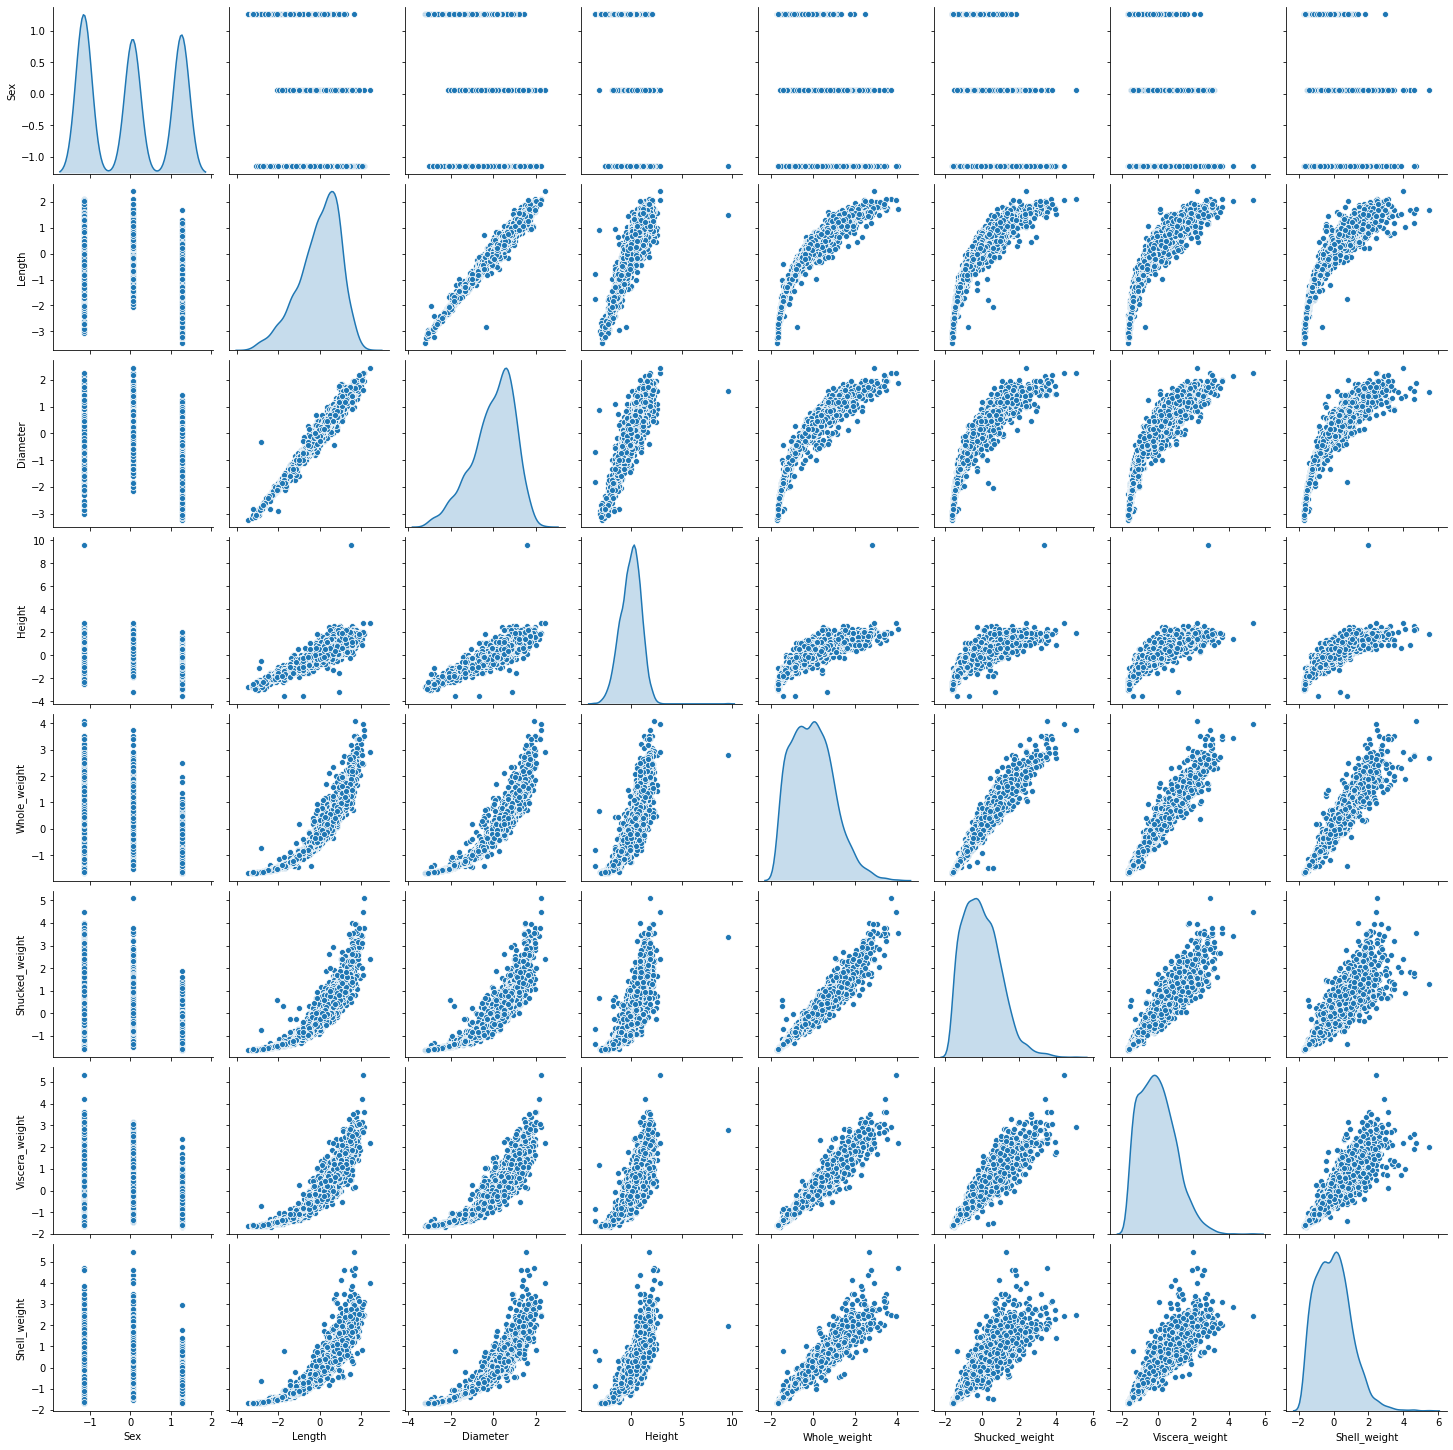

In [128]:
sns.pairplot(std_train,diag_kind="kde")

In [88]:
# Stat generation: To be later used for standarization step
train_stats = train_data.describe()
test_stats = test_data.describe()

train_stats = train_stats.transpose()
test_stats = test_stats.transpose()

# Data standardization (NOT NORMALIZATION)

### When working with Machine Learning models normalization and standardization are used interchangeably, however, they differ in meaning. 

### Standarization is defined as: 
$$z_i = \frac{x_i + \bar x}{s} $$


### While normalization is defined as: 
$$X_{new} = \frac{x_i - x_{min}}{x_{max} - {x_min}}$$

Standardization ensure that the model is not affected by different range of values for different attributes. While normalization if based on ensuring that the values for a particular attribute remains in a set interval i.e. 0 to 1 or -1 to 1. For more information please refer to this [link](https://www.statisticshowto.com/probability-and-statistics/normal-distributions/normalized-data-normalization)

In [102]:
#standardization step
std_train = (train_data - train_stats['mean']) / train_stats['std']
std_test = (test_data - test_stats['mean']) / test_stats['std']

In [129]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(train_data.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(10, activation='relu'),
    layers.Dense(1)
  ])

optimizer = tf.keras.optimizers.RMSprop(0.001)

model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])

model.summary()

history = model.fit(
  std_train, train_labels,
  epochs=1000, validation_split = 0.2, verbose=0)


Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_111 (Dense)            (None, 128)               1152      
_________________________________________________________________
dense_112 (Dense)            (None, 64)                8256      
_________________________________________________________________
dense_113 (Dense)            (None, 32)                2080      
_________________________________________________________________
dense_114 (Dense)            (None, 10)                330       
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 11        
Total params: 11,829
Trainable params: 11,829
Non-trainable params: 0
_________________________________________________________________


In [136]:
test_predictions = model.predict(std_test).flatten()


(-10.0, 10.0)

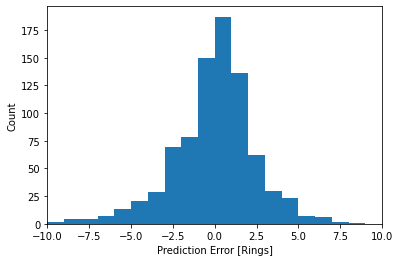

In [137]:
error = test_predictions - test_labels
plt.hist(error,  [i for i in range(-len(error),len(error))] )
plt.xlabel("Prediction Error [Rings]")
_ = plt.ylabel("Count")
plt.xlim([-10.0,10.0])

(-10.0, 10.0)

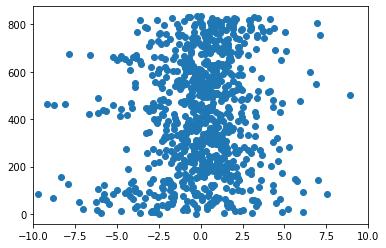

In [138]:
plt.scatter(error,  [i for i in range(len(error))] )
plt.xlim([-10.0,10.0])